In [24]:
import pandas as pd 
import numpy as np

# Data Preprocessing

# Model Selection

## Baseline: Use preprocessed data

In [25]:
# recipes = pd.read_csv('./data/PP_recipes.csv')
recipes = pd.read_parquet('./data/recipes_cleaned.parquet')
users = pd.read_csv('./data/PP_users.csv')

display(recipes.head(2))
display(users.head(2))

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_ingredients,techniques_decoded,n_steps,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbs_PDV
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",5,"[combine, drain, strain]",11,228.2,2.0,2.0,8.0,9.0,1.0,15.0
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",12,"[bake, combine, melt, pour, refrigerat, smooth...",9,249.4,16.0,92.0,8.0,11.0,27.0,11.0


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39


In [26]:
ingr_map = pd.read_pickle('./data/ingr_map.pkl')

ingr_map

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [27]:
users.head(2)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39


In [28]:
recipes.head(2)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_ingredients,techniques_decoded,n_steps,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbs_PDV
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",5,"[combine, drain, strain]",11,228.2,2.0,2.0,8.0,9.0,1.0,15.0
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",12,"[bake, combine, melt, pour, refrigerat, smooth...",9,249.4,16.0,92.0,8.0,11.0,27.0,11.0


# Ratings Prediction

In [29]:
train = pd.read_csv('./data/interactions_train.csv')
test = pd.read_csv('./data/interactions_test.csv')
val = pd.read_csv('./data/interactions_validation.csv')

train_df = train.copy()
val_df   = val.copy()
test_df  = test.copy()

### Baseline: user, item and global mean

In [46]:
full_train = pd.concat([train, test])
user_mean = train.groupby('u')['rating'].mean()
item_mean = train.groupby('i')['rating'].mean()
global_mean = train['rating'].mean()

def naive_pred(uid):
    if uid in user_mean.index:
        return user_mean[uid]
    else:
        return global_mean
    
val_pred = val['u'].apply(naive_pred)
test_pred = test['u'].apply(naive_pred)

In [31]:
from sklearn.metrics import mean_squared_error

print('test error: ',mean_squared_error(test['rating'], test_pred))


test error:  1.8334151093136641


### Test: Linear Regression

### Test: Matrix Factorization

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm

# Training tensors
train_users  = torch.tensor(train_df["u"].values, dtype=torch.long)
train_items  = torch.tensor(train_df["i"].values, dtype=torch.long)
train_ratings = torch.tensor(train_df["rating"].values, dtype=torch.float32)

# Validation tensors
val_users  = torch.tensor(val_df["u"].values, dtype=torch.long)
val_items  = torch.tensor(val_df["i"].values, dtype=torch.long)
val_ratings = torch.tensor(val_df["rating"].values, dtype=torch.float32)

In [33]:
n_users = max(train_df["u"].max(), val_df["u"].max()) + 1
n_items = max(train_df["i"].max(), val_df["i"].max()) + 1

print(n_users, n_items)

25076 178264


In [34]:
global_mean = train_df["rating"].mean()
user_means = train_df.groupby("u")["rating"].mean().to_dict()
item_means = train_df.groupby("i")["rating"].mean().to_dict()

In [50]:
class MF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=64):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.item_bias = nn.Embedding(n_items, 1)

        # Xavier Initialization (helps a lot)
        nn.init.xavier_uniform_(self.user_emb.weight)
        nn.init.xavier_uniform_(self.item_emb.weight)

    def forward(self, u, i):
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        dot = (u_vec * i_vec).sum(dim=1)
        b_u = self.user_bias(u).squeeze()
        b_i = self.item_bias(i).squeeze()
        return dot + b_u + b_i

def train_mf(train_users, train_items, train_ratings,
             val_users, val_items, val_ratings, 
             n_users, n_items, 
             embed_dim=64, epochs=10, lr=1e-3):

    model = MF(n_users, n_items, n_factors=embed_dim)
    opt = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    for epoch in range(epochs):
        model.train()
        opt.zero_grad()

        preds = model(train_users, train_items)
        loss = loss_fn(preds, train_ratings)
        reg = 1e-3 * (
            model.user_emb.weight.norm(2).pow(2) +
            model.item_emb.weight.norm(2).pow(2)
        )
        loss += reg
        loss.backward()
        opt.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(val_users, val_items)
            val_loss = loss_fn(val_pred, val_ratings)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss {loss.item():.4f} | Val Loss {val_loss.item():.4f}")

    return model

def predict_with_cold_start(model, user_ids, item_ids):
    preds = []

    for u, i in zip(user_ids, item_ids):

        u_known = u in user_means
        i_known = i in item_means

        if u_known and i_known:
            # Normal MF prediction
            pred = np.clip(model(
                torch.tensor([u]),
                torch.tensor([i])
            ).item(), 1, 5)

        elif u_known and not i_known:
            # Cold-start item → return user mean
            pred = user_means[u]

        elif not u_known and i_known:
            # Cold-start user → return item mean
            pred = item_means[i]

        else:
            # New user + new item → global mean
            pred = global_mean

        preds.append(pred)

    return torch.tensor(preds, dtype=torch.float32)

In [51]:
model = train_mf(
    train_users, train_items, train_ratings,
    val_users, val_items, val_ratings,
    n_users, n_items,
    embed_dim=64,
    epochs=20,
    lr=1e-3
)

Epoch 1/20 | Train Loss 23.9508 | Val Loss 21.6264
Epoch 2/20 | Train Loss 23.8545 | Val Loss 21.6180
Epoch 3/20 | Train Loss 23.7804 | Val Loss 21.6095
Epoch 4/20 | Train Loss 23.7251 | Val Loss 21.6011
Epoch 5/20 | Train Loss 23.6837 | Val Loss 21.5926
Epoch 6/20 | Train Loss 23.6518 | Val Loss 21.5842
Epoch 7/20 | Train Loss 23.6261 | Val Loss 21.5757
Epoch 8/20 | Train Loss 23.6039 | Val Loss 21.5673
Epoch 9/20 | Train Loss 23.5829 | Val Loss 21.5588
Epoch 10/20 | Train Loss 23.5618 | Val Loss 21.5504
Epoch 11/20 | Train Loss 23.5402 | Val Loss 21.5419
Epoch 12/20 | Train Loss 23.5182 | Val Loss 21.5335
Epoch 13/20 | Train Loss 23.4961 | Val Loss 21.5251
Epoch 14/20 | Train Loss 23.4743 | Val Loss 21.5166
Epoch 15/20 | Train Loss 23.4531 | Val Loss 21.5082
Epoch 16/20 | Train Loss 23.4325 | Val Loss 21.4998
Epoch 17/20 | Train Loss 23.4128 | Val Loss 21.4914
Epoch 18/20 | Train Loss 23.3940 | Val Loss 21.4830
Epoch 19/20 | Train Loss 23.3757 | Val Loss 21.4745
Epoch 20/20 | Train L

In [52]:
def predict_single(model, u, i):
    model.eval()
    u = torch.tensor([u], dtype=torch.long)
    i = torch.tensor([i], dtype=torch.long)
    return np.clip(model(u, i).item(), 1, 5)

print(predict_single(model, u=0, i=100))

1.0


In [53]:
model.eval()
test_users = torch.tensor(test_df["u"].values, dtype=torch.long)
test_items = torch.tensor(test_df["i"].values, dtype=torch.long)
test_ratings = torch.tensor(test_df["rating"].values, dtype=torch.float32)

with torch.no_grad():
    preds = predict_with_cold_start(model, 
                                test_df["u"], 
                                test_df["i"])

    test_mse = nn.MSELoss()(preds, test_ratings).item()

print("Test MSE:", test_mse)

Test MSE: 1.833415150642395


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# ------------------------------
# Matrix Factorization Model
# ------------------------------
class MF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=64):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.item_bias = nn.Embedding(n_items, 1)
        
        # Initialize embeddings
        nn.init.xavier_uniform_(self.user_emb.weight)
        nn.init.xavier_uniform_(self.item_emb.weight)
        nn.init.zeros_(self.user_bias.weight)
        nn.init.zeros_(self.item_bias.weight)

    def forward(self, u, i):
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        dot = (u_vec * i_vec).sum(dim=1)
        b_u = self.user_bias(u).squeeze()
        b_i = self.item_bias(i).squeeze()
        return dot + b_u + b_i


# ------------------------------
# Training Function
# ------------------------------
def train_mf(train_users, train_items, train_ratings,
             val_users, val_items, val_ratings, 
             n_users, n_items, embed_dim=64, epochs=20, 
             lr=1e-3, batch_size=1024, weight_decay=1e-2):

    model = MF(n_users, n_items, n_factors=embed_dim)
    opt = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    # Create DataLoaders for minibatch training
    train_dataset = TensorDataset(train_users, train_items, train_ratings)
    val_dataset = TensorDataset(val_users, val_items, val_ratings)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=2)

    for epoch in range(epochs):
        model.train()
        train_losses = []

        for u_batch, i_batch, r_batch in train_loader:
            opt.zero_grad()
            preds = model(u_batch, i_batch)
            loss = loss_fn(preds, r_batch)
            reg = 1e-3 * (
                model.user_emb.weight.norm(2).pow(2) +
                model.item_emb.weight.norm(2).pow(2)
            )
            loss += reg
            loss.backward()
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for u_batch, i_batch, r_batch in val_loader:
                val_pred = model(u_batch, i_batch)
                val_loss = loss_fn(val_pred, r_batch)
                val_losses.append(val_loss.item())

        avg_train_loss = np.mean(train_losses)
        avg_val_loss = np.mean(val_losses)
        scheduler.step(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    return model


# ------------------------------
# Improved Cold-Start Prediction
# ------------------------------
def predict_with_cold_start(model, user_ids, item_ids, user_means=user_mean, item_means=item_mean, global_mean=global_mean):
    preds = []

    for u, i in zip(user_ids, item_ids):
        u_known = u in user_means
        i_known = i in item_means

        if u_known and i_known:
            pred = model(torch.tensor([u]), torch.tensor([i])).item()
        else:
            # Weighted mean approach for cold-start
            u_mean = user_means.get(u, global_mean)
            i_mean = item_means.get(i, global_mean)
            pred = 0.5 * u_mean + 0.5 * i_mean

        # Clip ratings to allowed range
        pred = np.clip(pred, 1, 5)
        preds.append(pred)

    return torch.tensor(preds, dtype=torch.float32)

model = train_mf(
    train_users, train_items, train_ratings,
    val_users, val_items, val_ratings,
    n_users, n_items,
    embed_dim=64, # prev 64
    epochs=20,
    lr=1e-3
)

model.eval()
test_users = torch.tensor(test_df["u"].values, dtype=torch.long)
test_items = torch.tensor(test_df["i"].values, dtype=torch.long)
test_ratings = torch.tensor(test_df["rating"].values, dtype=torch.float32)

with torch.no_grad():
    preds = predict_with_cold_start(model, 
                                test_df["u"], 
                                test_df["i"],
                                user_means=user_mean,
                                item_means=item_mean,
                                global_mean=global_mean)

    test_mse = nn.MSELoss()(preds, test_ratings).item()

print("Test MSE:", test_mse)

Epoch 1/20 | Train Loss: 20.5318 | Val Loss: 19.2526
Epoch 2/20 | Train Loss: 18.9976 | Val Loss: 19.1925
Epoch 3/20 | Train Loss: 18.2288 | Val Loss: 19.1716
Epoch 4/20 | Train Loss: 17.8074 | Val Loss: 19.1642
Epoch 5/20 | Train Loss: 17.5767 | Val Loss: 19.1611
Epoch 6/20 | Train Loss: 17.4533 | Val Loss: 19.1589
Epoch 7/20 | Train Loss: 17.3918 | Val Loss: 19.1587
Epoch 8/20 | Train Loss: 17.3616 | Val Loss: 19.1583
Epoch 9/20 | Train Loss: 17.3482 | Val Loss: 19.1582
Epoch 10/20 | Train Loss: 17.3415 | Val Loss: 19.1577
Epoch 11/20 | Train Loss: 17.3409 | Val Loss: 19.1578
Epoch 12/20 | Train Loss: 17.3400 | Val Loss: 19.1577
Epoch 13/20 | Train Loss: 17.3370 | Val Loss: 19.1580
Epoch 14/20 | Train Loss: 17.3372 | Val Loss: 19.1586
Epoch 15/20 | Train Loss: 17.3370 | Val Loss: 19.1583
Epoch 16/20 | Train Loss: 17.3342 | Val Loss: 19.1585
Epoch 17/20 | Train Loss: 17.3350 | Val Loss: 19.1586
Epoch 18/20 | Train Loss: 17.3351 | Val Loss: 19.1587
Epoch 19/20 | Train Loss: 17.3331 | V

# user recommendation

In [40]:
def recommend_for_user(model, user_id, K=10, interactions_df=None):
    model.eval()

    # Items already rated
    rated_items = set(interactions_df[interactions_df["u"] == user_id]["i"].values)

    # All items
    all_items = np.arange(n_items)

    # Mask out rated
    candidates = [i for i in all_items if i not in rated_items]

    # Predict all candidate item scores
    user_tensor = torch.tensor([user_id] * len(candidates), dtype=torch.long)
    item_tensor = torch.tensor(candidates, dtype=torch.long)

    scores = model(user_tensor, item_tensor).detach().numpy()

    # Sort top-K
    idx = np.argsort(scores)[::-1][:K]
    top_items = np.array(candidates)[idx]
    top_scores = scores[idx]

    return list(zip(top_items, top_scores))

recommendations = recommend_for_user(
    model,
    user_id=0,
    K=10,
    interactions_df=train_df
)
print(recommendations)

[(np.int64(60814), np.float32(4.308842)), (np.int64(3731), np.float32(4.142206)), (np.int64(85016), np.float32(4.1100807)), (np.int64(36470), np.float32(4.107868)), (np.int64(16217), np.float32(4.0380745)), (np.int64(111780), np.float32(3.9641325)), (np.int64(125728), np.float32(3.9434605)), (np.int64(146502), np.float32(3.9183202)), (np.int64(851), np.float32(3.8870332)), (np.int64(67189), np.float32(3.8496218))]


# K-means Clustering

In [41]:
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from scipy.sparse import hstack

# -----------------------------
# STEP 1 — Robust parsing helpers
# -----------------------------

def safe_parse_list(x):
    """
    Convert a stringified list to a real Python list.
    Accepts:
      - list
      - string representation of list: "[1,2,3]"
      - NaN
    Returns a list in all cases.
    """
    if isinstance(x, list):
        return x
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return []
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            if isinstance(v, list):
                return v
        except:
            return []
    return []


def ensure_nested_list(lst):
    """
    For ingredient_tokens (list of lists).
    Ensures inner elements are lists too.
    """
    lst = safe_parse_list(lst)
    return [safe_parse_list(x) for x in lst]


# -----------------------------
# STEP 2 — Fix your recipes DataFrame
# -----------------------------

def repair_recipe_dataframe(recipes):
    list_columns = ["ingredient_ids", "ingredient_tokens", "steps_tokens"]

    for col in list_columns:
        if col in recipes.columns:
            if col == "ingredient_tokens":  # nested
                recipes[col] = recipes[col].apply(ensure_nested_list)
            else:                           # flat lists
                recipes[col] = recipes[col].apply(safe_parse_list)
    
    return recipes


# -----------------------------
# STEP 3 — Build string features for TF-IDF
# -----------------------------

def join_flat_ids_as_str(lst):
    lst = safe_parse_list(lst)
    return " ".join(f"ing_{int(x)}" for x in lst)

def join_nested_ids_as_str(nested):
    nested = ensure_nested_list(nested)
    flat = [f"ing_{int(x)}" for sub in nested for x in sub]
    return " ".join(flat)

def join_steps_as_str(step_tokens):
    step_tokens = safe_parse_list(step_tokens)
    return " ".join(f"tok_{int(x)}" for x in step_tokens)


def build_text_columns(recipes):

    # 1. Canonical ingredient list (unique set)
    recipes["ingredients_ids_str"] = recipes["ingredient_ids"].apply(join_flat_ids_as_str)

    # 2. Full ingredient tokens (nested per step)
    recipes["ingredient_tokens_str"] = recipes["ingredient_tokens"].apply(join_nested_ids_as_str)

    # 3. Steps
    recipes["steps_str"] = recipes["steps_tokens"].apply(join_steps_as_str)

    return recipes


# -----------------------------
# STEP 4 — Vectorize and embed
# -----------------------------

def tfidf_svd(text_series, max_features=5000, n_components=64):
    """Produces a low-dimensional embedding for any text column."""
    tfidf = TfidfVectorizer(max_features=max_features)
    X = tfidf.fit_transform(text_series)

    svd = TruncatedSVD(n_components=n_components)
    X_reduced = svd.fit_transform(X)

    return normalize(X_reduced), tfidf, svd


def build_recipe_embeddings(recipes):

    # Vectorize each modality
    X_ing_ids, tf_ing_ids, svd_ing_ids = tfidf_svd(recipes["ingredients_ids_str"], max_features=6000)
    X_ing_tokens, tf_ing_tokens, svd_ing_tokens = tfidf_svd(recipes["ingredient_tokens_str"], max_features=8000)
    X_steps, tf_steps, svd_steps = tfidf_svd(recipes["steps_str"], max_features=10000)

    # Concatenate
    X_final = np.hstack([X_ing_ids, X_ing_tokens, X_steps])

    X_final = normalize(X_final)

    models = {
        "tfidf_ing_ids": tf_ing_ids,
        "svd_ing_ids": svd_ing_ids,
        "tfidf_ing_tokens": tf_ing_tokens,
        "svd_ing_tokens": svd_ing_tokens,
        "tfidf_steps": tf_steps,
        "svd_steps": svd_steps
    }

    return X_final, models


# -----------------------------
# STEP 5 — K-Means Clustering
# -----------------------------

def cluster_recipes(X, k=40):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X)
    return labels, km


# -----------------------------
# FULL PIPELINE CALL
# -----------------------------

def build_full_recipe_pipeline(recipes):
    print("Repairing dataframe...")
    recipes = repair_recipe_dataframe(recipes)

    print("Building text columns...")
    recipes = build_text_columns(recipes)

    print("Building embeddings...")
    X, models = build_recipe_embeddings(recipes)

    print("Clustering...")
    labels, km = cluster_recipes(X)

    recipes["cluster"] = labels

    return recipes, X, models, km

In [42]:
recipes_clean, embeddings, models, km = build_full_recipe_pipeline(recipes)

Repairing dataframe...
Building text columns...
Building embeddings...


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
# -----------------------------
# Helper to fix stringified lists in user df
# -----------------------------
def safe_parse_list(x):
    if isinstance(x, list):
        return x
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return []
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            if isinstance(v, list):
                return v
        except:
            pass
    return []


def repair_user_dataframe(users):
    for col in ["items", "ratings", "techniques"]:
        if col in users.columns:
            users[col] = users[col].apply(safe_parse_list)
    return users


# -------------------------------------------
# BUILD USER EMBEDDINGS
# -------------------------------------------
def build_user_embeddings(users, recipes, recipe_emb_matrix):
    """
    users: DataFrame with columns ['u', 'items', 'ratings']
    recipes: recipes DataFrame with 'id' = recipe ID
    recipe_emb_matrix: final embedding matrix (N_recipes x D)
    """

    # Map recipe ID → row index in embeddings
    id_to_row = {rid: i for i, rid in enumerate(recipes["id"])}

    dim = recipe_emb_matrix.shape[1]
    user_emb = np.zeros((len(users), dim))

    for idx, row in users.iterrows():
        recipe_ids = row["items"]
        recipe_ids = safe_parse_list(recipe_ids)

        valid_indices = [id_to_row[r] for r in recipe_ids if r in id_to_row]

        if len(valid_indices) == 0:
            user_emb[idx] = np.zeros(dim)
        else:
            user_emb[idx] = recipe_emb_matrix[valid_indices].mean(axis=0)

    user_emb = normalize(user_emb)
    return user_emb

def build_weighted_user_embeddings(users, recipes, recipe_emb_matrix):
    """
    users: DataFrame with columns ['u', 'items', 'ratings']
    recipes: DataFrame with column 'id' (aligned to recipe_emb_matrix)
    recipe_emb_matrix: numpy array of shape (num_recipes, dim)
    """
    # Map recipe ID → row index in embeddings
    id_to_row = {rid: i for i, rid in enumerate(recipes["id"])}

    dim = recipe_emb_matrix.shape[1]
    user_emb = np.zeros((len(users), dim))

    for uidx, row in users.iterrows():
        recipe_ids = row['items']
        recipe_ids = safe_parse_list(recipe_ids)

        if len(recipe_ids) == 0:
            continue

        # Find valid indices in recipe_emb_matrix
        valid_indices = [id_to_row[r] for r in recipe_ids if r in id_to_row]
        if len(valid_indices) == 0:
            continue

        # Corresponding embeddings
        vecs = recipe_emb_matrix[valid_indices]

        # Apply weights if ratings exist
        ratings = safe_parse_list(row.get("ratings", []))
        if len(ratings) != len(valid_indices) or len(ratings) == 0:
            weights = np.ones(len(valid_indices))
        else:
            weights = np.array(ratings, dtype=float)

        weights = weights / weights.sum()  # normalize
        weighted_emb = (vecs * weights[:, None]).sum(axis=0)
        user_emb[uidx] = weighted_emb

    # Replace any NaNs with zeros
    user_emb = np.nan_to_num(user_emb)

    # Normalize
    user_emb = normalize(user_emb)

    return user_emb


# -------------------------------------------
# USER CLUSTERING
# -------------------------------------------
def cluster_users(user_emb, k=20):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(user_emb)
    return labels, km


# -------------------------------------------
# RECOMMEND RECIPES TO A USER
# -------------------------------------------
def recommend_recipes_for_user(user_id, users, user_emb, recipe_emb, recipes, top_k=10):
    """
    user_id: ID of the user in `users.u`
    """

    # Find user's index
    uidx = users.index[users["u"] == user_id][0]

    uvec = user_emb[uidx]                         # user embedding vector

    # Compute cosine similarity to all recipe embeddings
    sims = (recipe_emb @ uvec)

    # Exclude recipes user already interacted with
    seen = set(users.loc[uidx, "items"])

    recipe_ids = recipes["id"].values

    rec_df = pd.DataFrame({
        "recipe_id": recipe_ids,
        "sim": sims
    })

    rec_df = rec_df[~rec_df["recipe_id"].isin(seen)]
    rec_df = rec_df.sort_values("sim", ascending=False).head(top_k)

    # Return recipe metadata if you want
    return rec_df.merge(recipes, left_on="recipe_id", right_on="id")

In [ ]:
users_clean = repair_user_dataframe(users)
user_emb = build_weighted_user_embeddings(users_clean, recipes_clean, embeddings)

# Cluster users
user_labels, km_users = cluster_users(user_emb, k=30)
users_clean["cluster"] = user_labels

/var/folders/pd/jy2tczp11tvgftzcy6kn7txh0000gn/T/ipykernel_50986/3856858133.py:90: RuntimeWarning: invalid value encountered in divide
  weights = weights / weights.sum()  # normalize


In [ ]:
recommendations = recommend_recipes_for_user(
    user_id=0,
    users=users_clean,
    user_emb=user_emb,
    recipe_emb=embeddings,
    recipes=recipes_clean,
    top_k=10
)

print(recommendations[["id", "name_tokens", "sim"]])

       id                                        name_tokens       sim
0  387363            [40480, 2032, 20975, 2624, 1781, 40481]  0.705457
1  199363                [40480, 35790, 38308, 40118, 40481]  0.697691
2  151521  [40480, 15022, 11332, 23348, 17476, 21170, 556...  0.697541
3  424657                [40480, 19351, 30902, 11434, 40481]  0.697380
4  102729             [40480, 15022, 5867, 519, 2875, 40481]  0.689268
5  470294  [40480, 4835, 917, 479, 12395, 16464, 6237, 55...  0.688143
6    7027  [40480, 5635, 771, 692, 564, 19310, 11434, 166...  0.686495
7  167154  [40480, 548, 717, 21, 2373, 3744, 19708, 6003,...  0.685683
8   66390  [40480, 27102, 26, 1261, 264, 6003, 19811, 40481]  0.682964
9  479410  [40480, 2382, 16071, 488, 2147, 6883, 870, 164...  0.682484


In [ ]:
recommendations

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,recipe_id,sim,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,ingredients_ids_str,ingredient_tokens_str,steps_str,cluster
0,387363,0.705457,387363,61618,"[40480, 2032, 20975, 2624, 1781, 40481]","[[1069, 21653, 16039], [8780], [12227, 9689], ...","[40480, 40482, 6018, 481, 2377, 6183, 617, 481...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0,"[1649, 840, 6563, 5010, 3203, 1986, 7655, 1297...",ing_1649 ing_840 ing_6563 ing_5010 ing_3203 in...,ing_1069 ing_21653 ing_16039 ing_8780 ing_1222...,tok_40480 tok_40482 tok_6018 tok_481 tok_2377 ...,36
1,199363,0.697691,199363,129279,"[40480, 35790, 38308, 40118, 40481]","[[35790, 38308, 40118], [3137, 1430, 11332], [...","[40480, 40482, 4309, 35009, 38308, 28135, 556,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[7609, 2817, 5010, 3203, 840, 4863, 2683, 7655...",ing_7609 ing_2817 ing_5010 ing_3203 ing_840 in...,ing_35790 ing_38308 ing_40118 ing_3137 ing_143...,tok_40480 tok_40482 tok_4309 tok_35009 tok_383...,38
2,151521,0.697541,151521,43181,"[40480, 15022, 11332, 23348, 17476, 21170, 556...","[[10444, 6020], [3283, 19104], [15022, 796, 96...","[40480, 40482, 500, 246, 1719, 28058, 240, 715...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",2,"[5006, 7921, 3203, 6270, 5319, 4675, 384, 7168...",ing_5006 ing_7921 ing_3203 ing_6270 ing_5319 i...,ing_10444 ing_6020 ing_3283 ing_19104 ing_1502...,tok_40480 tok_40482 tok_500 tok_246 tok_1719 t...,16
3,424657,0.697380,424657,117876,"[40480, 19351, 30902, 11434, 40481]","[[2738, 21170], [6953], [1430, 1301, 11332], [...","[40480, 40482, 1892, 2738, 11892, 666, 6255, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[6201, 6270, 3486, 840, 5010, 7655, 7751, 4880...",ing_6201 ing_6270 ing_3486 ing_840 ing_5010 in...,ing_2738 ing_21170 ing_6953 ing_1430 ing_1301 ...,tok_40480 tok_40482 tok_1892 tok_2738 tok_1189...,0
4,102729,0.689268,102729,18173,"[40480, 15022, 5867, 519, 2875, 40481]","[[5867, 519, 2875], [17918], [6953], [11332], ...","[40480, 40482, 7087, 481, 17918, 240, 6953, 48...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[4449, 2683, 6270, 5319, 840, 1043, 5010, 3203...",ing_4449 ing_2683 ing_6270 ing_5319 ing_840 in...,ing_5867 ing_519 ing_2875 ing_17918 ing_6953 i...,tok_40480 tok_40482 tok_7087 tok_481 tok_17918...,38
5,470294,0.688143,470294,59228,"[40480, 4835, 917, 479, 12395, 16464, 6237, 55...","[[12395, 38308, 40118], [1430, 827, 6591], [71...","[40480, 40482, 645, 512, 604, 566, 1719, 38308...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[5627, 3502, 5168, 6270, 590, 5006, 5010, 3184...",ing_5627 ing_3502 ing_5168 ing_6270 ing_590 in...,ing_12395 ing_38308 ing_40118 ing_1430 ing_827...,tok_40480 tok_40482 tok_645 tok_512 tok_604 to...,20
6,7027,0.686495,7027,136719,"[40480, 5635, 771, 692, 564, 19310, 11434, 166...","[[17869, 6020], [2738, 11892], [19414], [6953]...","[40480, 40482, 2525, 17869, 6020, 500, 246, 17...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[7557, 6201, 5010, 6270, 5319, 3219, 5168, 690...",ing_7557 ing_6201 ing_5010 ing_6270 ing_5319 i...,ing_17869 ing_6020 ing_2738 ing_11892 ing_1941...,tok_40480 tok_40482 tok_2525 tok_17869 tok_602...,20
7,167154,0.685683,167154,130271,"[40480, 548, 717, 21, 2373, 3744, 19708, 6003,...","[[25905, 3674], [19414], [8780], [15022, 796, ...","[40480, 40482, 2454, 25905, 3674, 556, 11468, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[897, 5010, 840, 3203, 6061, 4189, 6324, 2499,...",ing_897 ing_5010 ing_840 ing_3203 ing_6061 ing...,ing_25905 ing_3674 ing_19414 ing_8780 ing_1502...,tok_40480 tok_40482 tok_2454 tok_25905 tok_367...,20
8,66390,0.682964,66390,33663,"[40480, 27102, 26, 1261, 264, 6003, 19811, 40481]","[[1454, 6878], [978, 26, 1261, 264], [11468, 1...","[40480, 40482, 21662, 6878, 488, 26, 1261, 911...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7783, 5961, 673, 840, 5010, 2846, 6270, 3486,...",ing_7783 ing_5961 ing_673 in

# Explaining Kmeans Labels

In [ ]:
recipe_raw = pd.read_csv('./data/RAW_recipes.csv')

recipe_merge = recipe_raw[['name','id']]
recommendations_filtered = recommendations[['recipe_id','sim','cluster']]

In [ ]:
# Rename for clarity
recommendations_filtered = recommendations_filtered.rename(columns={"recipe_id": "id"})

# Merge on recipe ID
recommendations_merged = recommendations_filtered.merge(
    recipe_merge, on="id", how="left"
)

# Reorder columns for readability
recommendations_merged = recommendations_merged[['id', 'name', 'sim', 'cluster']]

recommendations_merged.head(10)

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,name,sim,cluster
0,387363,easy potlikker,0.705457,36
1,199363,venison tenderloin,0.697691,38
2,151521,garlic pepper encrusted buffalo steaks with wi...,0.697541,16
3,424657,dutch spiced beef,0.697380,0
4,102729,garlic chicken livers,0.689268,38
5,470294,sauteed pork medallions with port,0.688143,20
6,7027,rindergulasch beef goulash,0.686495,20
7,167154,holubky slovak stuffed cabbage rolls,0.685683,20
8,66390,vegetarian lentil stuffed tomatoes,0.682964,22
9,479410,lip smacking and finger sticking good drumsticks,0.682484,20


In [ ]:
recommendations_merged['cluster'].value_counts().sort_values()

cluster
36    1
16    1
0     1
22    1
38    2
20    4
Name: count, dtype: int64

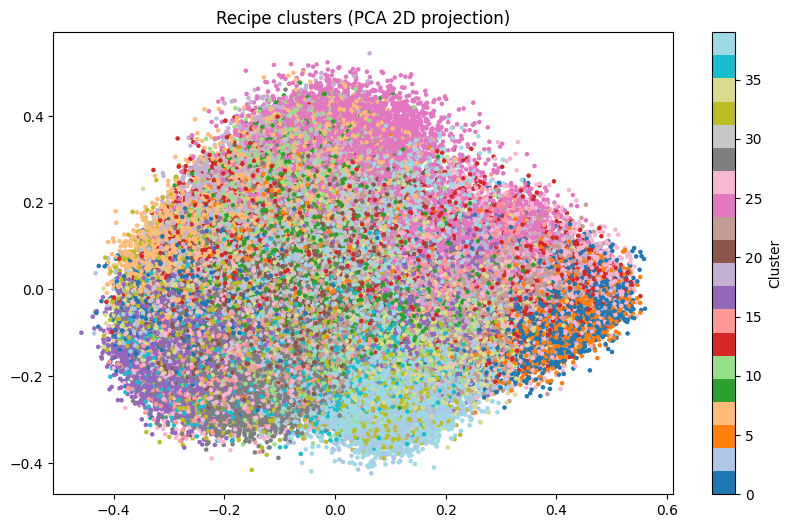

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = embeddings  # recipe embeddings
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=recipes_clean['cluster'], cmap='tab20', s=5)
plt.colorbar(label='Cluster')
plt.title('Recipe clusters (PCA 2D projection)')
plt.show()

In [ ]:
cluster_groups = recipes_clean.groupby('cluster')

for cluster_id, group in cluster_groups:
    group_ids = group[['id','cluster']]
    merged = group_ids.merge(recipe_merge, on='id')
    print(f"\nCluster {cluster_id} (size {len(merged)}) top 5 recipes:")
    display(merged.head(5))


Cluster 0 (size 4580) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,473932,0,baked beef stew with carrots
1,108065,0,shrimp and corn soup
2,484058,0,bistro beef noodles a la slow cooker
3,285013,0,crock pot french dip sandwiches
4,410371,0,three sisters soup



Cluster 1 (size 6248) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,186383,1,chocolate oat cookie bars
1,155411,1,caramelized crust cinnalicious loaf cake
2,483476,1,forevermama s banana bread
3,135369,1,ginger drop cookies
4,146444,1,apple walnut sour cream bread



Cluster 2 (size 4151) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,331329,2,herbed garlic lentils
1,90000,2,crook s corner shrimp and grits
2,68190,2,rice pilaf with glazed tomatoes
3,51641,2,italian chicken and cannellini soup
4,38839,2,chicken chili bake



Cluster 3 (size 4037) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,424415,3,aromatic basmati rice rice cooker
1,91317,3,sorbet au champagne
2,119994,3,turkish leeks in olive oil
3,485107,3,yogurt lassi with sweet or savory variations
4,405609,3,sparkling cranberries



Cluster 4 (size 2137) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,76287,4,mexican stew
1,67948,4,ultimate taco salad
2,23469,4,balsamic chicken and veggies
3,77271,4,broccoli tortellini and bacon salad
4,20845,4,oyster crackers



Cluster 5 (size 4418) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,60244,5,chewy fudge drop cookies healthy
1,248727,5,heart shaped whole wheat pancakes with strawbe...
2,2780,5,oatmeal breakfast cookies
3,158997,5,black ginger cake low fat
4,415278,5,orange chocolate chip bread



Cluster 6 (size 6688) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,19485,6,italian style spinach
1,119464,6,green and gold peas with pasta
2,76792,6,crawfish fettuccini
3,99132,6,ez pasta bake
4,179802,6,herbed tomato endive salad



Cluster 7 (size 2609) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,102015,7,baked chicken breasts and rice
1,174243,7,dorito casserole
2,325901,7,popover chicken tarragon
3,16696,7,poppy seed chicken
4,11732,7,easy oven rice casserole



Cluster 8 (size 2538) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,200498,8,crispy buttermilk waffles
1,356953,8,cranberry cinnamon bread bread machine
2,443278,8,cranberry orange bagels
3,348192,8,poppy and sesame seed rolls bread machine
4,173582,8,winnipeg rye bread



Cluster 9 (size 7164) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,239063,9,octoberfest german potato salad
1,248556,9,new potatoes with saffron aioli
2,284628,9,zippy veggie salad
3,373442,9,webo yena deviled eggs
4,107153,9,anita s homemade ranch



Cluster 10 (size 3782) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,74301,10,mini tacos
1,193833,10,slow cooker beef and bean burritos
2,224958,10,fiesta taco lasagna
3,187622,10,chicken quesadillas low fat
4,281149,10,fabulous chile con queso soup tortilla



Cluster 11 (size 3631) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,465171,11,pink bavarian crown strawberry dream supreme
1,347224,11,pressure cooker sweet n sour chicken
2,34331,11,linguine with wild mushroom alfredo
3,99355,11,crock pot orange sesame chicken with toasted a...
4,338407,11,bits o teriyaki chicken



Cluster 12 (size 4521) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,250063,12,paula deen s brown sugar chewies
1,272917,12,mom s oat flour cut out cookies
2,150744,12,cream cheese filled light brownies
3,383303,12,slow cooker brownie cake squares
4,453943,12,coconut waffles



Cluster 13 (size 4115) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,76272,13,rosemary s hanky panky s
1,33093,13,chili burgers
2,222201,13,victory s boston burgers
3,194168,13,stuffed hamburgers
4,300668,13,potato chili



Cluster 14 (size 2485) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,330169,14,super easy sweet potato cake doctored cake mix
1,238940,14,strawberry yum yum cake
2,190651,14,black forest cake with cherries
3,335285,14,easy pumpkin black walnut bread cake
4,156571,14,valentine cookie pops



Cluster 15 (size 3991) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,294925,15,peaches chicken cutlets
1,67417,15,onion soup with parmigiano and cracked pepper
2,74694,15,roast beetroot and garlic dip
3,17691,15,basic boiled cabbage sabzi
4,126319,15,braised cauliflower and tomatoes



Cluster 16 (size 8531) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,156363,16,tres facile bell pepper and tomato salad
1,210242,16,roasted potatoes in golden garlic sauce treas...
2,16149,16,olive spread
3,284224,16,portuguese clam rice
4,376669,16,butterflied chicken with herbs and sticky lemon



Cluster 17 (size 3354) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,177640,17,blueberry lemon parfait
1,217063,17,california dreamin smoothie
2,92286,17,strawberry ice cream soda
3,380925,17,elephant and the monkey
4,20233,17,mint chocolate chip pie



Cluster 18 (size 4144) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,282065,18,farmhouse manicotti with optional meat sauce
1,95330,18,portabella mushroom with spinach and feta lasa...
2,345367,18,crock pot lasagna ww
3,256105,18,our favorite buffalo chicken pizza
4,275854,18,lasagna cheese soup



Cluster 19 (size 3727) top 5 recipes:

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,281968,19,pot de creme
1,293330,19,not your mama s chocolate chip cookies
2,285087,19,chocolate dipped heart cookies
3,257310,19,box of chocolate refill
4,92023,19,triple decker honey peanut butter brownies



Cluster 20 (size 4283) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,12896,20,easy chilli beans
1,358428,20,smoked pulled pork
2,418852,20,the geezer s deviled eggs
3,172440,20,sweet sticky pork ribs
4,150597,20,bacon roasted chicken with stuffing



Cluster 21 (size 2872) top 5 recipes:

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,27609,21,festive crock pot cranberry chicken
1,448995,21,apricot jalapeno glazed carrots
2,38990,21,broccoli with dijon vinaigrette
3,199416,21,yogurt dill dip with shallots
4,402088,21,rachael ray s mac and cheese lorraine



Cluster 22 (size 6348) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,408927,22,spicy cranberry chutney
1,458717,22,root beer pulled pork
2,129163,22,unattended prime rib roast
3,35888,22,ukranian coleslaw
4,182508,22,houlihan s herb roasted chicken



Cluster 23 (size 6529) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,116395,23,tropical lemon cream bars
1,288683,23,rich and creamy hot chocolate
2,503721,23,faroe island coffee with cardamom cream
3,141822,23,oh fudge choco peanut butter fudge
4,282376,23,white chocolate and cherry bread pudding



Cluster 24 (size 3795) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,110568,24,nana s marshmallow salad
1,289437,24,mashed potato casserole with garlic and green ...
2,152996,24,simply delicious new york style cheesecake
3,342573,24,cheesecake factory key lime cheesecake my ver...
4,321245,24,no bake chocolate cheesecake pie



Cluster 25 (size 5951) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,28423,25,savory tomatoes
1,74114,25,bacon cheddar cheese ball
2,93332,25,texas fudge
3,193809,25,cheesy veg burgers
4,216057,25,cheddar bacon and apple panini



Cluster 26 (size 5275) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,22598,26,cut and come again cake
1,359127,26,fried sugar cookies
2,454323,26,chinese rice cakes
3,178411,26,orange anise seed squares
4,205809,26,cocoa nut bread



Cluster 27 (size 4530) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,461449,27,sonoma diet chicken and black bean wrap
1,193253,27,flank steak with cilantro almond pesto
2,437737,27,cabbage salsa
3,332138,27,green chile sliders with tomatillo lime sauce
4,52967,27,somali stew maraq pronounced mah ruhk



Cluster 28 (size 6530) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,303460,28,jeera on cubes barbecue marinade
1,61723,28,pancit bihon
2,346674,28,tofu simmered in hoisin sauce by deborah madison
3,17973,28,ginger vegetable lo mein
4,89662,28,sun ya fried rice



Cluster 29 (size 4950) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,289290,29,sommer s chicken spaghetti
1,403652,29,valarie s chicken bruschetta
2,14099,29,island chicken packet
3,141106,29,barbecue chicken packets
4,358683,29,chicken with tarragon garlic olives



Cluster 30 (size 5079) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,312329,30,cheesy tomato soup with potatoes
1,277747,30,deviled beef hamburger patties
2,227883,30,crockery bbq beef for sandwiches
3,333705,30,bbq bat wings
4,169016,30,miracle marinade



Cluster 31 (size 3304) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,203634,31,sausage potato bake
1,284698,31,deer camp food
2,92228,31,scalloped potatoes alfredo
3,296570,31,garlic mini potatoes
4,374569,31,moosewood creme andalouse soup



Cluster 32 (size 3347) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,120122,32,spicy herbed halibut with pineapple
1,98500,32,spaghetti with italian sausage
2,139904,32,gyro style pork sandwiches
3,120101,32,charged up chilli paste
4,50224,32,sausage stuffed loaf



Cluster 33 (size 4053) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,504329,33,carrot soup moroccan style
1,470787,33,grilled lemon fennel pork
2,448742,33,marinated tofu in the style of feta cheese
3,61278,33,lemon curd stove top or microwave method lim...
4,114412,33,splenda lemonade



Cluster 34 (size 4198) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,69436,34,pork chops in brew
1,189073,34,roasted cod with prosciutto cherry tomatoes a...
2,113161,34,apple and onion stuffing muffins
3,324962,34,fake chili vegetarian
4,203914,34,escarole and beans in red sauce



Cluster 35 (size 6115) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,146223,35,pumpkin pie a la easy
1,305135,35,spicy caribbean glazed chicken
2,344757,35,cherry crisp from scratch
3,152450,35,apple banana casserole with almonds
4,201473,35,quick homemade applesauce no sugar added



Cluster 36 (size 3357) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,345403,36,tuscan lemon chicken skillet or grill
1,66791,36,minted peas and wax beans
2,264803,36,lime roasted green beans with marcona almonds
3,225207,36,whole foods sage garlic turkey burgers
4,116522,36,herbed chicken



Cluster 37 (size 2532) top 5 recipes:

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,227025,37,orange yogurt
1,275826,37,baklava latte
2,305393,37,ancient sweet with honey
3,227359,37,refresco de mango
4,58598,37,honey baked lentils



Cluster 38 (size 4722) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,163861,38,tom and kelly s chicken fried steak
1,154406,38,open faced vegetable sandwich
2,56964,38,green beans with pecan brown butter
3,59541,38,chicken fritters
4,53398,38,garlic bubble bread



Cluster 39 (size 3644) top 5 recipes:


/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,cluster,name
0,460214,39,spicy summer fruit salad
1,38919,39,oasis orbs
2,52526,39,caribbean banana treat
3,95096,39,strawberry mojito
4,232734,39,tropical fruit freeze


* TF-IDF vectorizer, then Kmeans/other clustering mechanism

* First try on tag list, then move on to steps and ingredients

3. Flavor Profile Recommender (Clustering + Recommendation).  
This dataset has ingredients, nutrition data, and steps → ideal for clustering recipes.
Steps:
Create a feature space for recipes:
Ingredients
Macronutrients (fat, protein, carb)
Cuisine tags (if you derive them via keyword search)
Cluster into flavor families (e.g., “savory umami,” “spicy Tex-Mex,” “sweet baking,” etc.).
Build a recommender that says:
“You seem to like high-protein Mediterranean recipes → try these.”
Cool evaluation:
Let your model label each cluster with an interpretable name using an LLM → super publishable and fun.

In [ ]:
interactions = pd.read_csv('./data/RAW_interactions.csv')
interactions

/Users/chris/Documents/GitHub/recommendr/.venv/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [ ]:
import plotly.express as px
series = interactions.groupby('user_id')['recipe_id'].count()

In [ ]:
px.histogram(series)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'variable=recipe_id<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'recipe_id',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'recipe_id',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': {'bdata': ('gAAaAwEAPAAfAAIABAAfACUAAQASAA' ... 'EAAQABAAEAAQABAAEAAQABAAEAAQA='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [ ]:
interactions.shape

(1132367, 5)